In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.09.28']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
947,Afghanistan,22.09.28,198876
1906,Africa,22.09.28,12354093
2853,Albania,22.09.28,332129
3800,Algeria,22.09.28,270662
4741,Andorra,22.09.28,46227
...,...,...,...
216135,Wallis and Futuna,22.09.28,761
217117,World,22.09.28,616533560
218019,Yemen,22.09.28,11935
218944,Zambia,22.09.28,333503


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
947,Afghanistan,22.09.28,198876
2853,Albania,22.09.28,332129
3800,Algeria,22.09.28,270662
4741,Andorra,22.09.28,46227
5664,Angola,22.09.28,103131
...,...,...,...
215425,Vietnam,22.09.28,11476908
216135,Wallis and Futuna,22.09.28,761
218019,Yemen,22.09.28,11935
218944,Zambia,22.09.28,333503


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
208234,United States,22.09.28,96249166
91273,India,22.09.28,44583360
70130,France,22.09.28,35353822
28252,Brazil,22.09.28,34654190
74837,Germany,22.09.28,33216006
184690,South Korea,22.09.28,24740635
207253,United Kingdom,22.09.28,23621956
98870,Italy,22.09.28,22395282
100783,Japan,22.09.28,21147468
164201,Russia,22.09.28,20609684


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
201637,Turkey,22.09.28,16873793
186568,Spain,22.09.28,13412263
150239,Oceania,22.09.28,12365265
215425,Vietnam,22.09.28,11476908
12368,Australia,22.09.28,10209239
...,...,...,...
216135,Wallis and Futuna,22.09.28,761
93179,International,22.09.28,721
213516,Vatican,22.09.28,29
203444,Tuvalu,22.09.28,20


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.09.28', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_20768\3636397820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.09.28', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.09.28,96249166
India,22.09.28,44583360
France,22.09.28,35353822
Brazil,22.09.28,34654190
Germany,22.09.28,33216006
South Korea,22.09.28,24740635
United Kingdom,22.09.28,23621956
Italy,22.09.28,22395282
Japan,22.09.28,21147468


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.09.28,96249166
1,India,22.09.28,44583360
2,France,22.09.28,35353822
3,Brazil,22.09.28,34654190
4,Germany,22.09.28,33216006
5,South Korea,22.09.28,24740635
6,United Kingdom,22.09.28,23621956
7,Italy,22.09.28,22395282
8,Japan,22.09.28,21147468
9,Russia,22.09.28,20609684


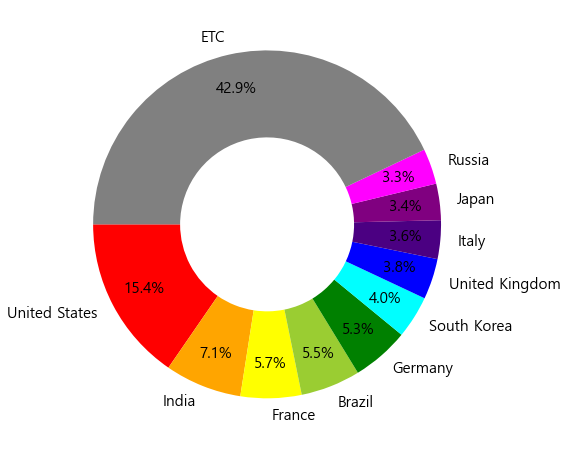

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()